Enter Soi 0.8
Enter Sor 0.3
Enter Swi 0.2
Enter µ0 1.5
Enter µw 0.4
 Max Recovery at 90% water cut= [49.] %
want to change recovery-yes
1-inject surfactant
2-inject alkaline surfactant
3-inject polymer
4-heat the oil
select appropiate option-2
performance after injecting alkaline surfactant
Final recovery= [63.] %
Increased recovery= [14.] %


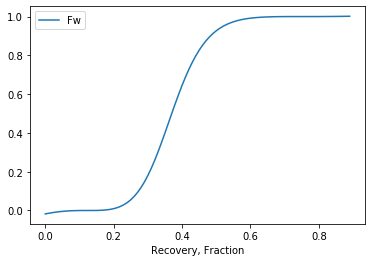

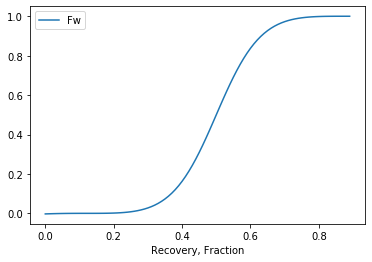

In [1]:
import pandas as pd
df = pd.DataFrame({"Soi": range(90),"Sor": range(90),"Swi": range(90),"µo": range(90),"µw": range(90),"Recovery, Fraction": range(90),"So": range(90),"Sw": range(90),"Sw*": range(90),"Kro": range(90),"Krw": range(90),"Fw": range(90)})

#accepting data
df["Soi"] = float(input("Enter Soi "))
df["Swi"] = float(input("Enter Sor "))
df["Sor"] = float(input("Enter Swi "))
df["µo"] = float(input("Enter µ0 "))
df["µw"] = float(input("Enter µw "))
df["Recovery, Fraction"] = df["Recovery, Fraction"] / 100


#calculation of parameters
df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
df["Sw"] = 1- df["So"]
df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
df["Krw"] = (df["Sw*"]*df["Sw*"]*df["Sw*"])
df["Kro"] = ((1-df["Sw*"])*(1-df["Sw*"])*(1-df["Sw*"]))
df["Fw"] = 1/(1+(df["Kro"]/df["Krw"])*(df["µw"]/df["µo"]))
df.drop(0 ,axis=0)

#plotting equation
data = df[["Recovery, Fraction","Fw"]]
data.plot.line(x="Recovery, Fraction", y="Fw")

#recovery %
d1 = data.loc[(data['Fw']>0.9) & (data["Fw"]<0.95)]
d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
d3 = d2["Recovery, Fraction"].values
d4 = d3*100
print(" Max Recovery at 90% water cut=",d4,"%")

#sensitivity analysis
i=str(input("want to change recovery-"))
if i=='yes':
    print("1-inject surfactant")
    print("2-inject alkaline surfactant")
    print("3-inject polymer")
    print("4-heat the oil")
    a=int(input("select appropiate option-"))
    
    if a==1:
        print("performance after injecting surfactant")
        df["Sor"]=0.1
        df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
        df["Sw"] = 1- df["So"]
        df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
        df["Krw"] = (df["Sw*"]**3)
        df["Kro"] = ((1-df["Sw*"])**3)
        df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
        data = df[["Recovery, Fraction","Fw"]]
        d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
        d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
        d3 = d2["Recovery, Fraction"].values
        d5 = d3*100
        d6 = d5- d4
        data.plot.line(x="Recovery, Fraction", y="Fw")
        print("Final recovery=",d3*100,"%")
        print("Increased recovery=",d6,"%")
    elif a==2:
        if df["µo"].head(1).values> 125:
            print("performance after injecting alkaline surfactant")
            df["Sor"]=0.1
            df["µw"]=125
            df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
            df["Sw"] = 1- df["So"]
            df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
            df["Krw"] = (df["Sw*"]**3)
            df["Kro"] = ((1-df["Sw*"])**3)
            df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
            data = df[["Recovery, Fraction","Fw"]]
            d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
            d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
            d3 = d2["Recovery, Fraction"].values
            d5 = d3*100
            d6 = d5- d4
            data.plot.line(x="Recovery, Fraction", y="Fw")
            print("Final recovery=",d3*100,"%")
            print("Increased recovery=",d6,"%")
        else:
            print("performance after injecting alkaline surfactant")
            df["Sor"]=0.1
            df["µw"]=df["µo"]
            df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
            df["Sw"] = 1- df["So"]
            df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
            df["Krw"] = (df["Sw*"]**3)
            df["Kro"] = ((1-df["Sw*"])**3)
            df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
            data = df[["Recovery, Fraction","Fw"]]
            d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
            d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
            d3 = d2["Recovery, Fraction"].values
            d5 = d3*100
            d6 = d5- d4
            data.plot.line(x="Recovery, Fraction", y="Fw")
            print("Final recovery=",d3*100,"%")
            print("Increased recovery=",d6,"%")
    elif a==3:
        if df["µo"].head(1).values> 125:
            print("performance after injecting polymer")
            df["µw"]=125
            df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
            df["Sw"] = 1- df["So"]
            df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
            df["Krw"] = (df["Sw*"]**3)
            df["Kro"] = ((1-df["Sw*"])**3)
            df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
            data = df[["Recovery, Fraction","Fw"]]
            d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
            d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
            d3 = d2["Recovery, Fraction"].values
            d5 = d3*100
            d6 = d5- d4
            data.plot.line(x="Recovery, Fraction", y="Fw")
            print("Final recovery=",d3*100,"%")
            print("Increased recovery=",d6,"%")
        else:
            print("performance after injecting polymer")
            df["µw"]=df["µo"]
            df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
            df["Sw"] = 1- df["So"]
            df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
            df["Krw"] = (df["Sw*"]**3)
            df["Kro"] = ((1-df["Sw*"])**3)
            df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
            data = df[["Recovery, Fraction","Fw"]]
            d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
            d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
            d3 = d2["Recovery, Fraction"].values
            d5 = d3*100
            d6 = d5- d4
            data.plot.line(x="Recovery, Fraction", y="Fw")
            print("Final recovery=",d3*100,"%")
            print("Increased recovery=",d6,"%")
    elif a==4:
        if df["µo"].head(1).values<10:
            print("not a good option in light oil try another method")
        else:
            print("performance after heating oil")
            df["µo"]= 5
            df["So"] = df["Soi"]-(df["Soi"]*df["Recovery, Fraction"])
            df["Sw"] = 1- df["So"]
            df["Sw*"] = (df["Sw"]-df["Swi"])/(1-df["Swi"]-df["Sor"])
            df["Krw"] = (df["Sw*"]**3)
            df["Kro"] = ((1-df["Sw*"])**3)
            df["Fw"] = 1/(1+(df["Kro"]*df["µw"])/(df["Krw"]*df["µo"]))
            data = df[["Recovery, Fraction","Fw"]]
            d1 = data.loc[(data['Fw']>0.89) & (data["Fw"]<0.95)]
            d2 = d1.loc[d1['Fw']==d1['Fw'].min()]
            d3 = d2["Recovery, Fraction"].values
            d5 = d3*100
            d6 = d5- d4
            data.plot.line(x="Recovery, Fraction", y="Fw")
            print("Final recovery=",d3*100,"%")
            print("Increased recovery=",d6,"%")
    else:
        print("incorrect input! please try from the avialable options")
else:
    print("Final Recovery=",d4,"%")